In [1]:
import torchxrayvision as xrv

C:\Users\Hoo Kai Sng\OneDrive - National University of Singapore\Documents\NUS\CS3244\Project\xrayenv\Lib\site-packages\torchxrayvision\utils.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
d = xrv.datasets.COVID19_Dataset(imgpath="data/images/", csvpath="data/csv/metadata.csv")

In [3]:
img = d[0]['img'][0]
print(f"sample image of shape {img.shape}")
print(f"dataset of length {len(d)}")
print(img)

sample image of shape (888, 882)
dataset of length 535
[[1024.      1015.9686  1007.93726 ... -469.83527 -477.86664 -477.86664]
 [1024.      1024.      1015.9686  ... -493.92938 -493.92938 -493.92938]
 [1024.      1024.      1015.9686  ... -501.96075 -509.99213 -509.99213]
 ...
 [1024.      1024.       983.84314 ... -172.6745  -156.61176 -148.58038]
 [1024.      1024.       983.84314 ... -252.98822 -244.95685 -244.95685]
 [1024.      1024.       983.84314 ... -437.70978 -429.6784  -421.64703]]


In [7]:
import torchxrayvision as xrv
from modules.preprocess import *
from modules.dataset import *
from modules.models import *
from modules.training import *
from modules.explain import *
from modules.exploration import *

In [11]:
from torch.utils.data import DataLoader

In [18]:
def train_and_run_model(model, train_loader, validation_loader, test_loader, sample_pos, sample_neg, model_name, vis = False, epochs = 10):
    model_trained, stats = train_model(model, train_loader, validation_loader, epochs, 0.001)
    train_metrics = get_metrics(model_trained, train_loader)
    test_metrics = get_metrics(model_trained, test_loader)

    pred_pos = 'positive' if (torch.sigmoid(model_trained(tensorize_image(sample_pos).unsqueeze(0))) >= 0.5).item() else 'negative'
    pred_neg = 'positive' if (torch.sigmoid(model_trained(tensorize_image(sample_neg).unsqueeze(0))) >= 0.5).item() else 'negative'
    print(f'Predicted {pred_pos}, {pred_neg} for postive, negative')    
    
    plot_loss_and_metric(epochs, stats['train']['loss'], stats['val']['loss'], stats['train']['f1'], stats['val']['f1'], f'{model_name} loss', f'{model_name} f1')
    
    if vis:
        for param in model_trained.parameters():
            param.requires_grad = True
        
        vis_comparison(model_trained, sample_pos, sample_neg)

    return train_metrics, test_metrics

#### Global Variables

In [9]:
d = xrv.datasets.COVID19_Dataset(imgpath = "data/images/", csvpath = "data/csv/metadata.csv")
BATCH_SIZE = 16
pos_idx, neg_idx = find_positive(d), find_negative(d)
sample_pos, sample_neg = d[pos_idx]['img'][0], d[neg_idx]['img'][0]

#### Unsampled Data

##### Data preparation

In [12]:
train_us, val_us, test_us = stratified_split(d)

train_ds_us = Covid19DataSet(train_us)
val_ds_us = Covid19DataSet(val_us)
test_ds_us = Covid19DataSet(test_us)

us_train = DataLoader(dataset = train_ds_us, batch_size = BATCH_SIZE, shuffle = True, num_workers = 0)
us_val = DataLoader(dataset = val_ds_us, batch_size = BATCH_SIZE, shuffle = False, num_workers = 0)
us_test = DataLoader(dataset = test_ds_us, batch_size = BATCH_SIZE, shuffle = False, num_workers = 0)

##### Linear Net

Training model
Training completed in 8mins 31.48s
Best Loss: 0.0756 | Training F1: 0.7992
Precision: 0.7897 | Recall: 0.8954 | F1: 0.8392 | Predicted positives: 271 | Predicted negatives: 103 | Total: 374
Precision: 0.7551 | Recall: 0.7115 | F1: 0.7327 | Predicted positives: 49 | Predicted negatives: 32 | Total: 81
Predicted positive, positive for postive, negative


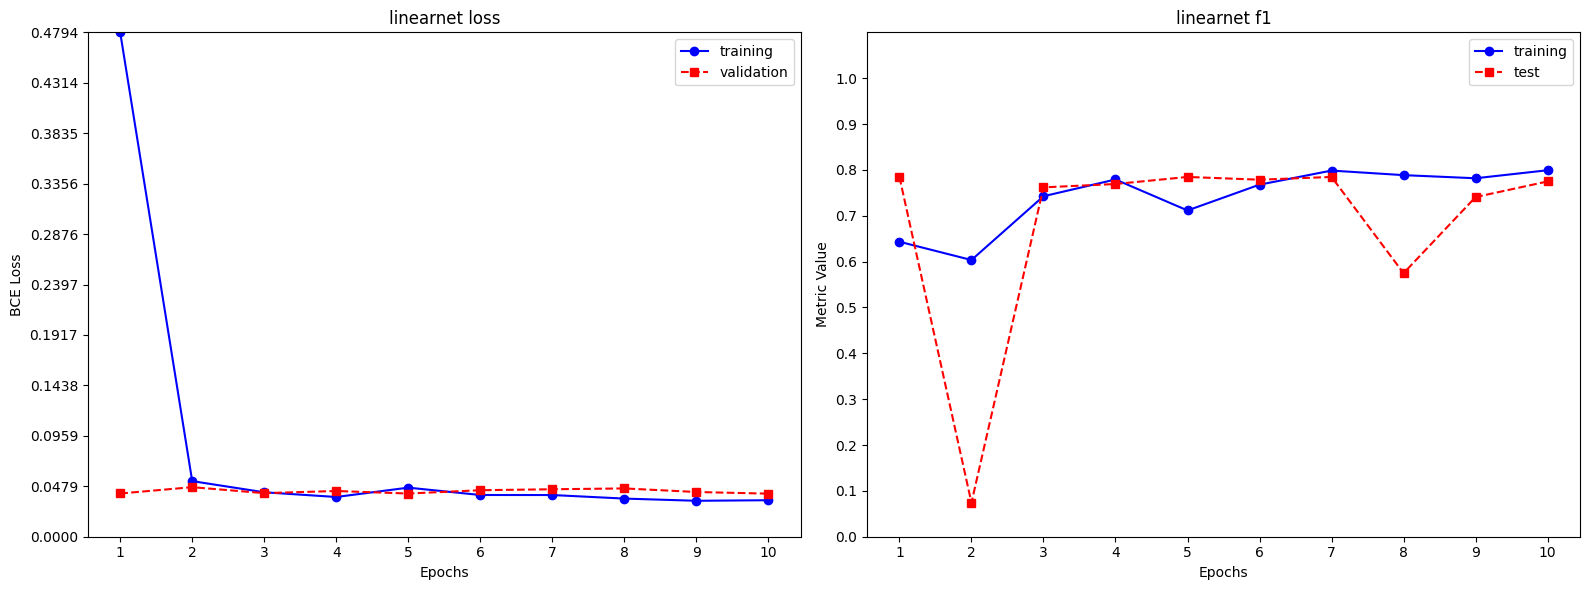

In [20]:
linearnet_v_us = LinearNet()

ln_us_train, ln_us_test = train_and_run_model(linearnet_v_us, us_train, us_val, us_test, sample_pos, sample_neg, 'linearnet')

##### ConvNet

Training model
Training completed in 1mins 30.23s
Best Loss: 0.0832 | Training F1: 0.7798
Precision: 0.6390 | Recall: 1.0000 | F1: 0.7798 | Predicted positives: 374 | Predicted negatives: 0 | Total: 374
Precision: 0.6420 | Recall: 1.0000 | F1: 0.7820 | Predicted positives: 81 | Predicted negatives: 0 | Total: 81
Predicted positive, positive for postive, negative


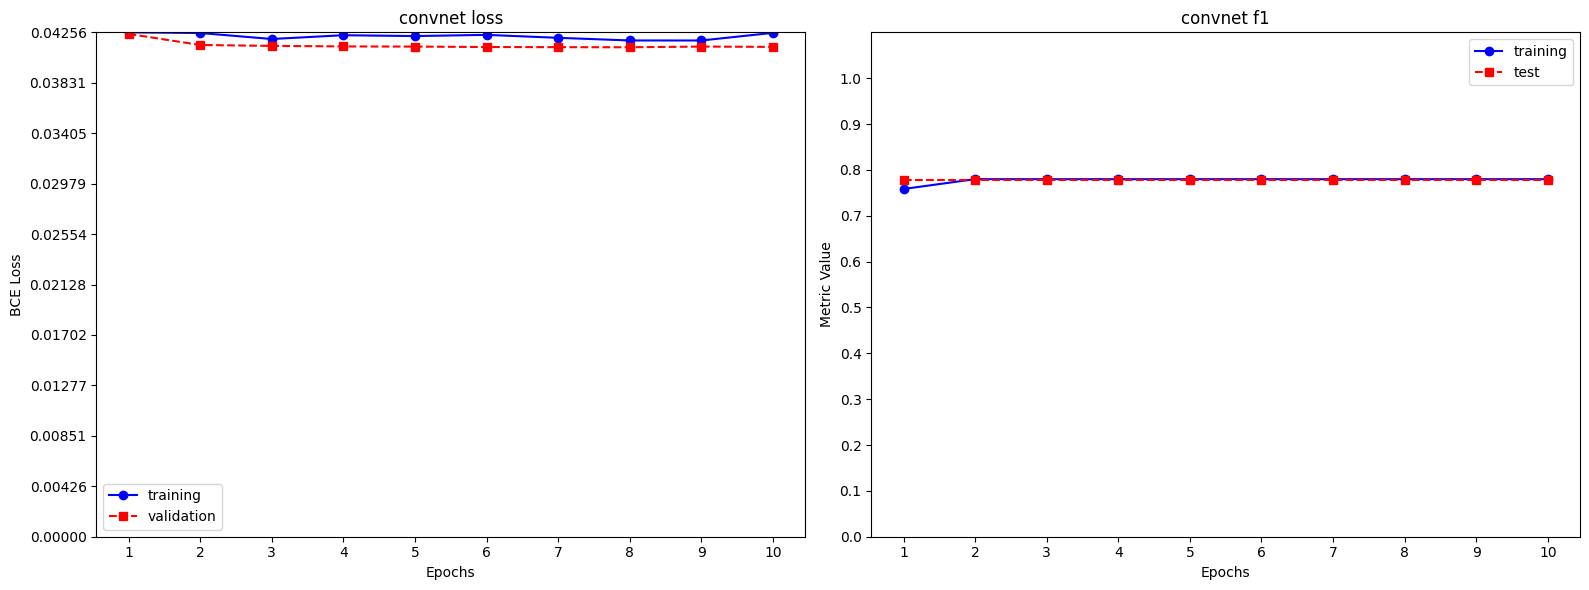

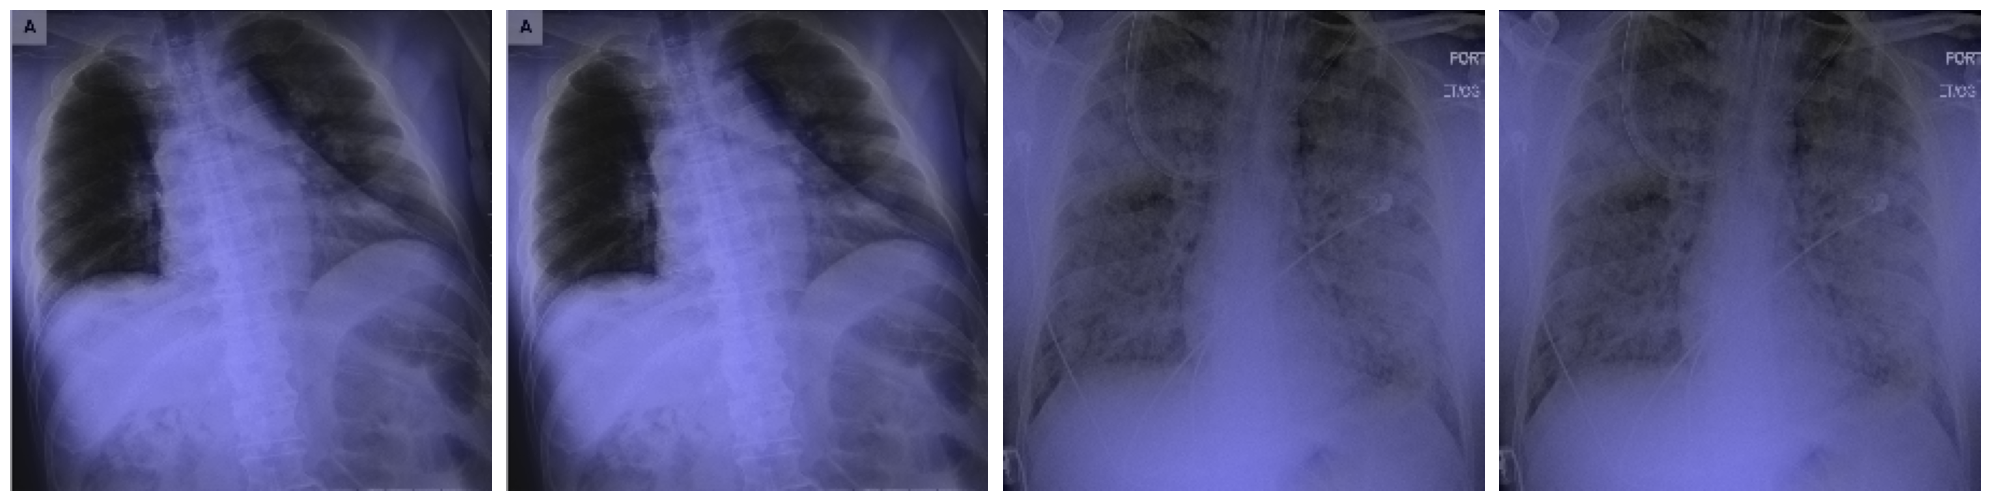

In [19]:
convnet_v_us = ConvNet()

cn_us_train, cn_us_test = train_and_run_model(convnet_v_us, us_train, us_val, us_test, sample_pos, sample_neg, 'convnet', vis = True)

##### ResNet

Training model
Training completed in 3mins 19.57s
Best Loss: 0.0643 | Training F1: 0.8566
Precision: 0.8112 | Recall: 0.9707 | F1: 0.8838 | Predicted positives: 286 | Predicted negatives: 88 | Total: 374
Precision: 0.7576 | Recall: 0.9615 | F1: 0.8475 | Predicted positives: 66 | Predicted negatives: 15 | Total: 81
Predicted positive, positive for postive, negative


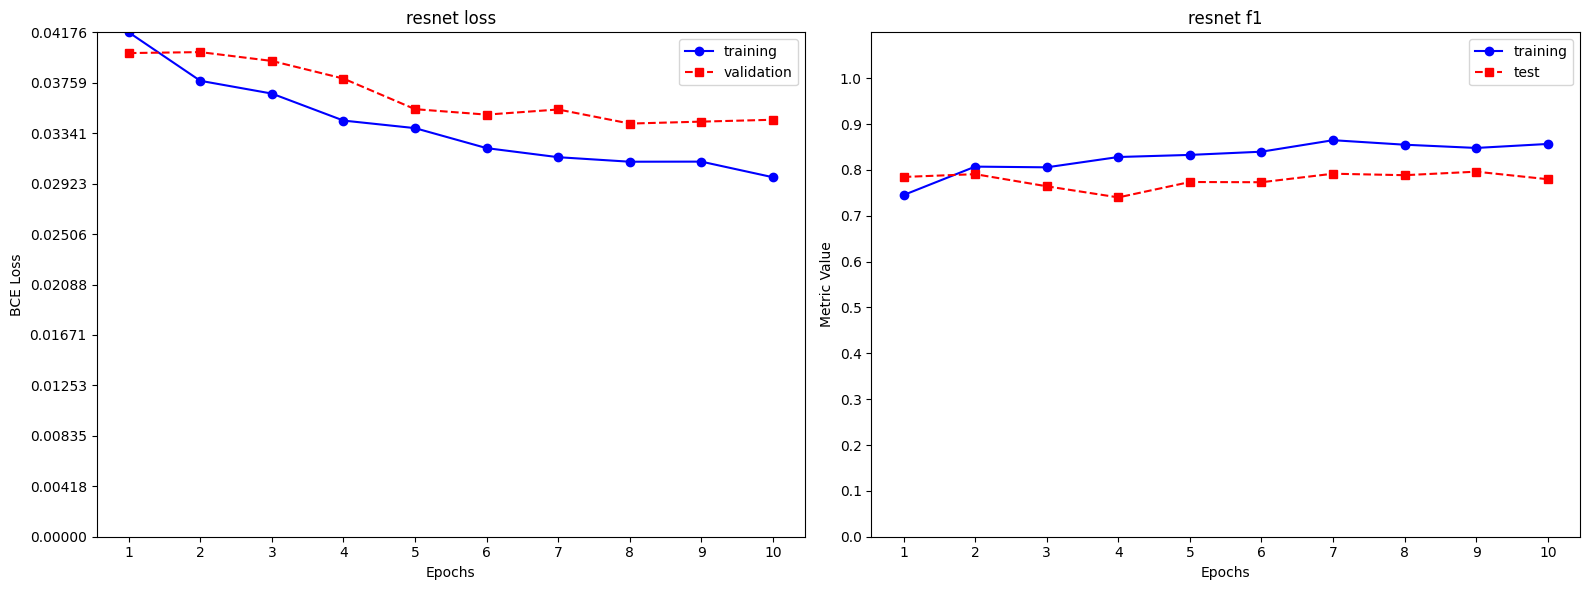

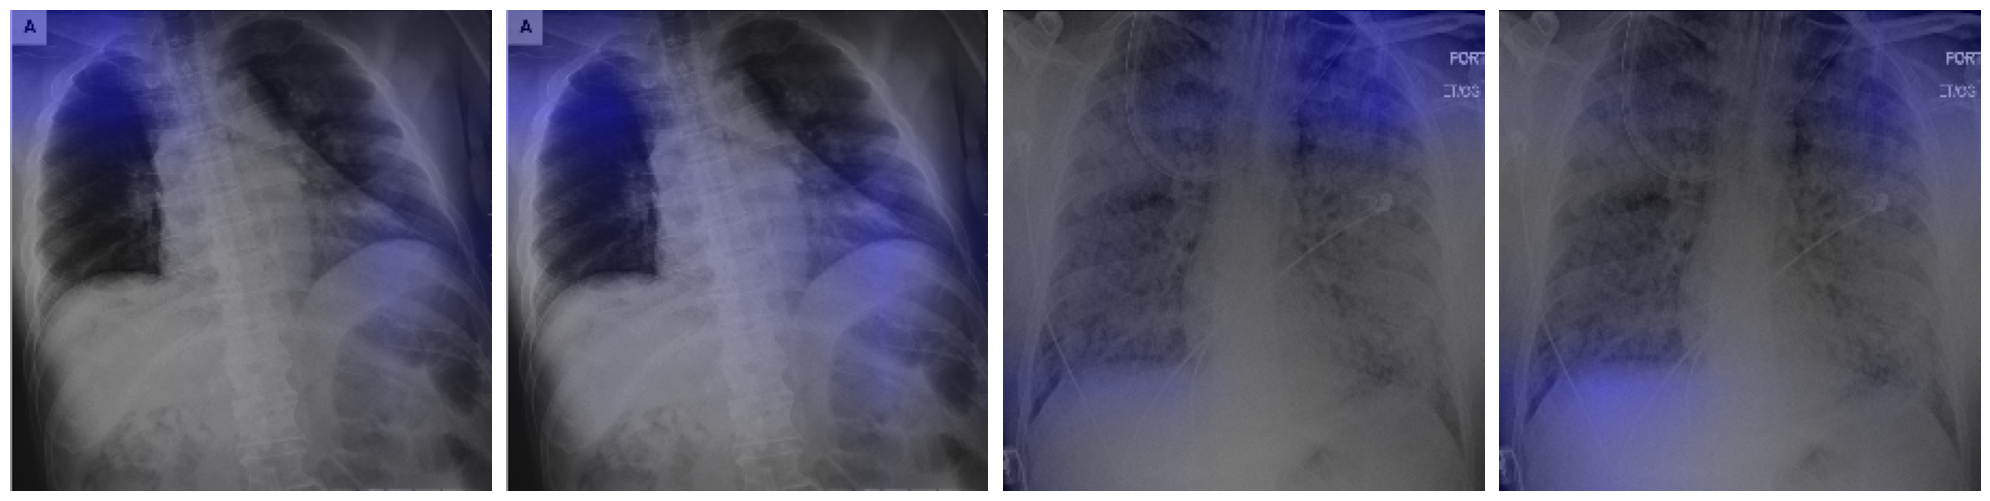

In [21]:
resnet_v_us = MyResNet18()

rn_us_train, rn_us_test = train_and_run_model(resnet_v_us, us_train, us_val, us_test, sample_pos, sample_neg, 'resnet', vis = True)

##### Densenet

Training model
Training completed in 7mins 17.36s
Best Loss: 0.0594 | Training F1: 0.8858
Precision: 0.8826 | Recall: 0.9121 | F1: 0.8971 | Predicted positives: 247 | Predicted negatives: 127 | Total: 374
Precision: 0.7547 | Recall: 0.7692 | F1: 0.7619 | Predicted positives: 53 | Predicted negatives: 28 | Total: 81
Predicted positive, positive for postive, negative


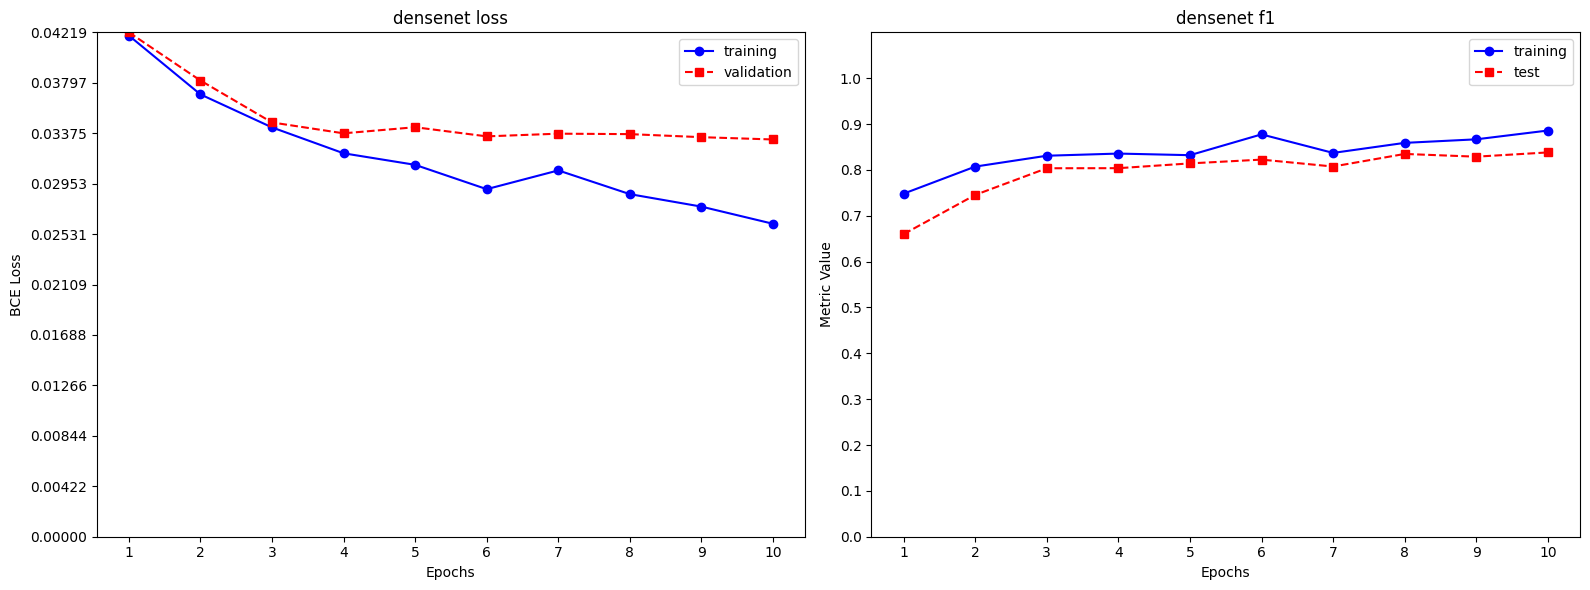

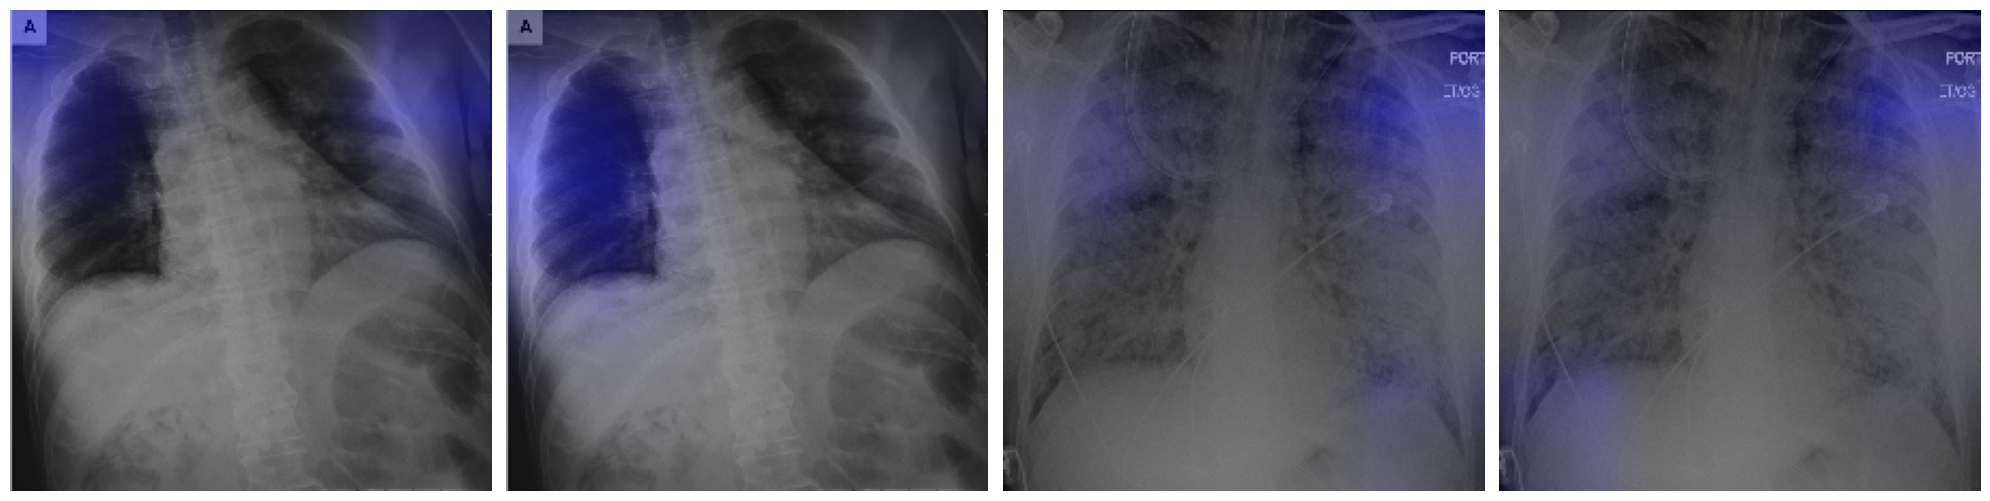

In [22]:
densenet_v_us = MyDenseNet()

dn_us_train, dn_us_test = train_and_run_model(densenet_v_us, us_train, us_val, us_test, sample_pos, sample_neg, 'densenet', vis = True)

##### Models comparison

In [24]:
headers = ['Model', 'Precision', 'Recall', 'F1 Score']
unsampled_metrics = [
    ['linearnet (train)', ln_us_train['prec'], ln_us_train['rec'], ln_us_train['f1']],
    ['linearnet (test)', ln_us_test['prec'], ln_us_test['rec'], ln_us_test['f1']],
    ['convnet (train)', cn_us_train['prec'], cn_us_train['rec'], cn_us_train['f1']],
    ['convnet (test)',cn_us_test['prec'], cn_us_test['rec'], cn_us_test['f1']],
    ['resnet (train)', rn_us_train['prec'], rn_us_train['rec'], rn_us_train['f1']],
    ['resnet (test)', rn_us_test['prec'],rn_us_test['rec'], rn_us_test['f1']],
    ['densenet (train)', dn_us_train['prec'], dn_us_train['rec'], dn_us_train['f1']],
    ['densenet (test)', dn_us_test['prec'], dn_us_test['rec'], dn_us_test['f1']]
]
create_table(headers, unsampled_metrics)

| Model | Precision | Recall | F1 Score |
| :- | :- | :- | :- |
| linearnet (train) | 0.7897 | 0.8954 | 0.8392 |
| linearnet (test) | 0.7551 | 0.7115 | 0.7327 |
| convnet (train) | 0.639 | 1.0 | 0.7798 |
| convnet (test) | 0.642 | 1.0 | 0.782 |
| resnet (train) | 0.8112 | 0.9707 | 0.8838 |
| resnet (test) | 0.7576 | 0.9615 | 0.8475 |
| densenet (train) | 0.8826 | 0.9121 | 0.8971 |
| densenet (test) | 0.7547 | 0.7692 | 0.7619 |



#### Resampled Data

##### Data preparation

In [25]:
train_rs, val_rs, test_rs = stratified_split(d, resample = True)

train_ds_rs = Covid19DataSet(train_rs)
val_ds_rs = Covid19DataSet(val_rs)
test_ds_rs = Covid19DataSet(test_rs)

rs_train = DataLoader(dataset = train_ds_rs, batch_size = BATCH_SIZE, shuffle = True, num_workers = 0)
rs_val = DataLoader(dataset = val_ds_rs, batch_size = BATCH_SIZE, shuffle = False, num_workers = 0)
rs_test = DataLoader(dataset = test_ds_rs, batch_size = BATCH_SIZE, shuffle = False, num_workers = 0)

##### LinearNet

Training model
Training completed in 10mins 16.62s
Best Loss: 0.0845 | Training F1: 0.6269
Precision: 0.5010 | Recall: 1.0000 | F1: 0.6676 | Predicted positives: 477 | Predicted negatives: 1 | Total: 478
Precision: 0.6420 | Recall: 1.0000 | F1: 0.7820 | Predicted positives: 81 | Predicted negatives: 0 | Total: 81
Predicted positive, positive for postive, negative


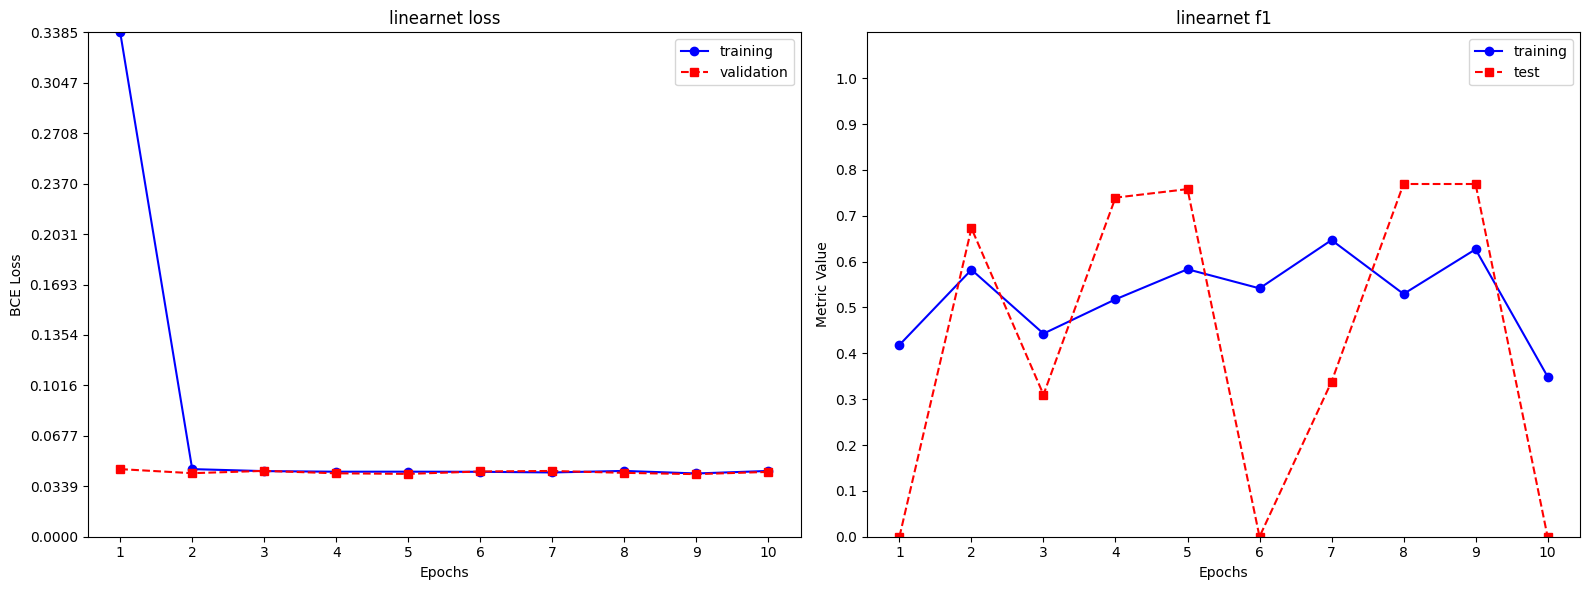

In [26]:
linearnet_v_rs = LinearNet()

ln_rs_train, ln_rs_test = train_and_run_model(linearnet_v_rs, rs_train, rs_val, rs_test, sample_pos, sample_neg, 'linearnet')

##### ConvNet

Training model
Training completed in 1mins 47.45s
Best Loss: 0.0867 | Training F1: 0.3863
Precision: 0.5000 | Recall: 1.0000 | F1: 0.6667 | Predicted positives: 478 | Predicted negatives: 0 | Total: 478
Precision: 0.6420 | Recall: 1.0000 | F1: 0.7820 | Predicted positives: 81 | Predicted negatives: 0 | Total: 81
Predicted positive, positive for postive, negative


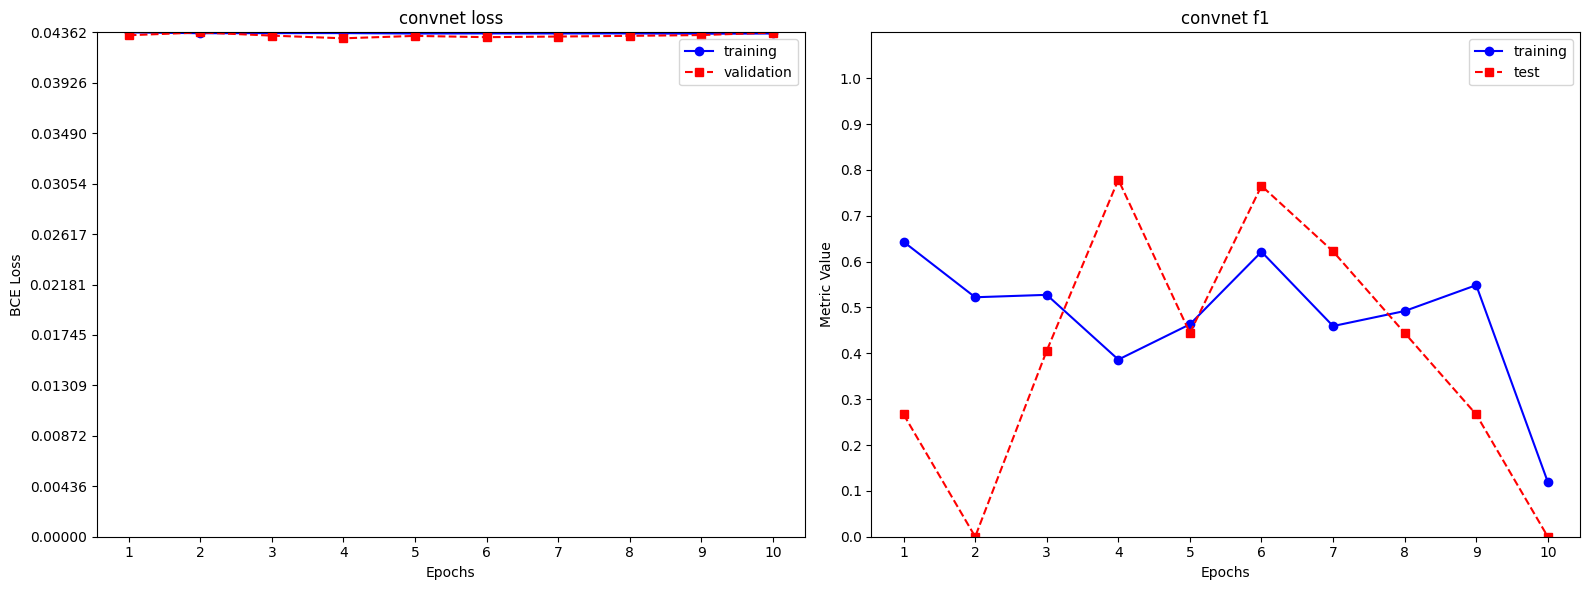

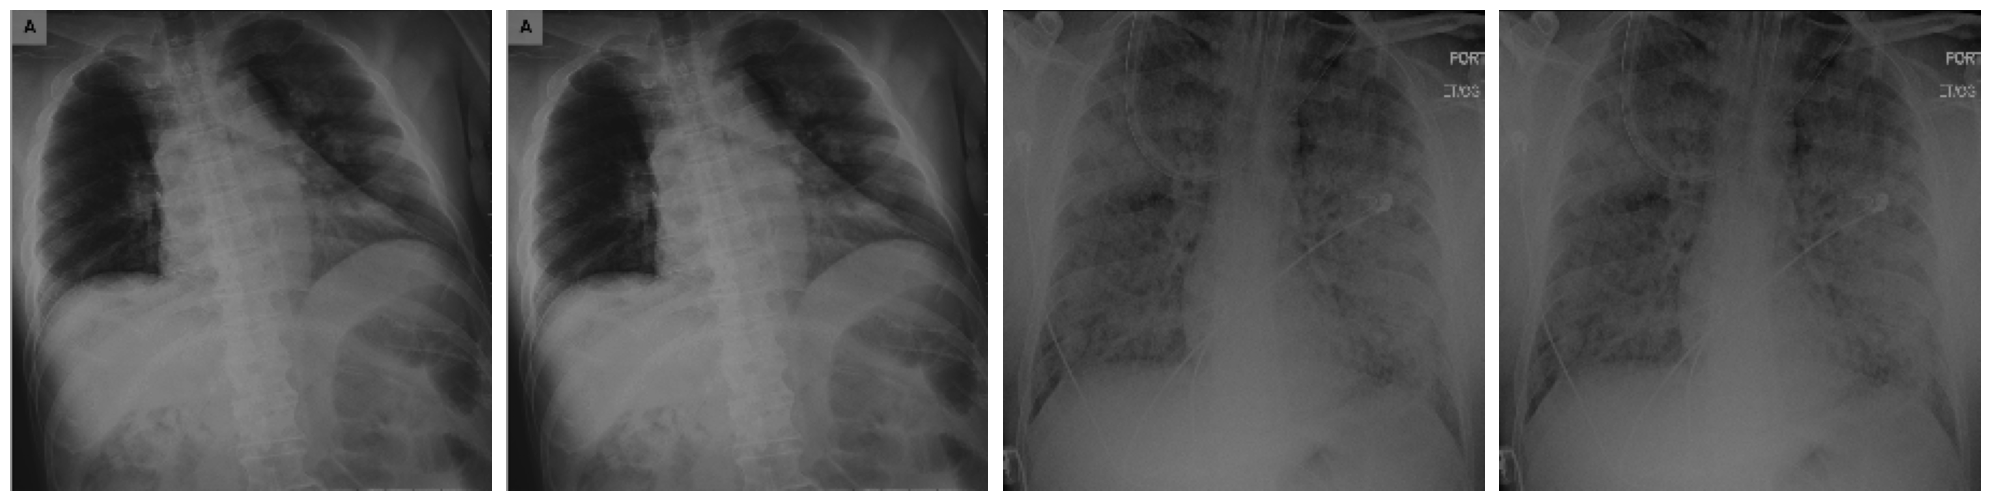

In [27]:
convnet_v_rs = ConvNet()

cn_rs_train, cn_rs_test = train_and_run_model(convnet_v_rs, rs_train, rs_val, rs_test, sample_pos, sample_neg, 'convnet', vis = True)

##### ResNet

Training model
Training completed in 4mins 3.58s
Best Loss: 0.0660 | Training F1: 0.7816
Precision: 0.7629 | Recall: 0.9289 | F1: 0.8377 | Predicted positives: 291 | Predicted negatives: 187 | Total: 478
Precision: 0.7447 | Recall: 0.6731 | F1: 0.7071 | Predicted positives: 47 | Predicted negatives: 34 | Total: 81
Predicted positive, positive for postive, negative


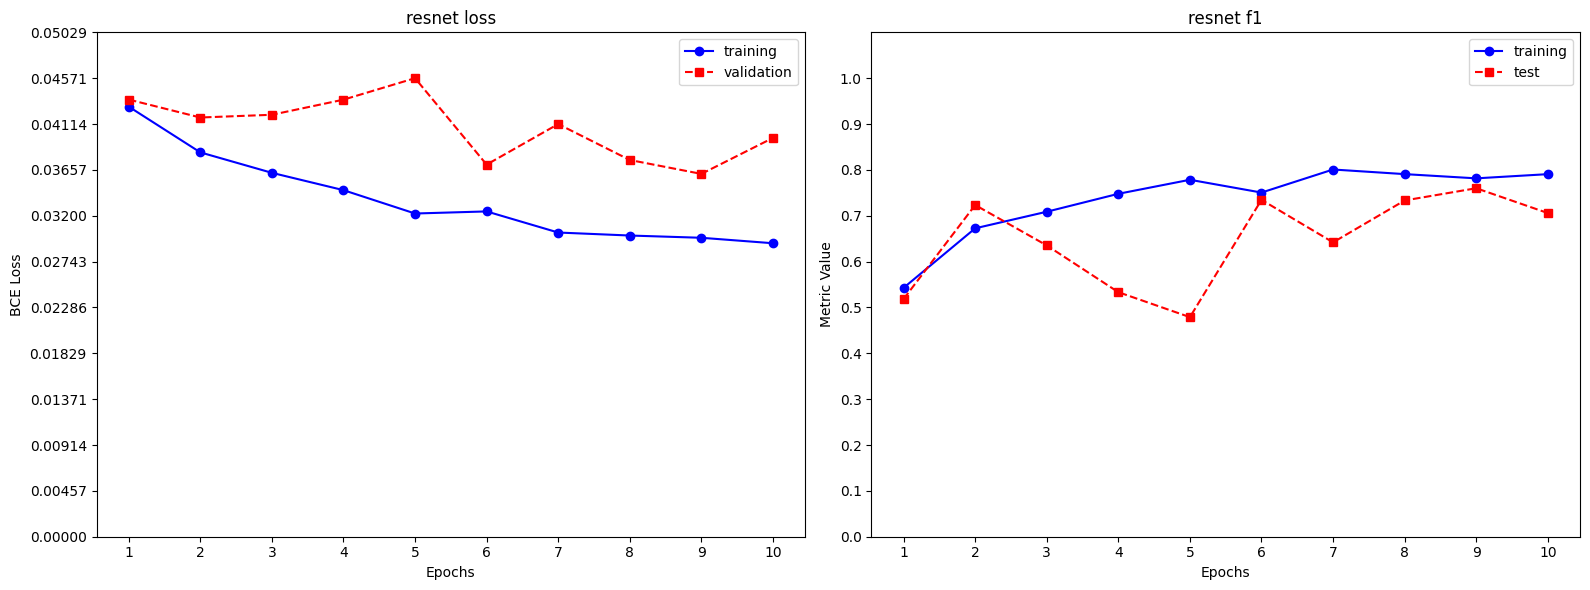

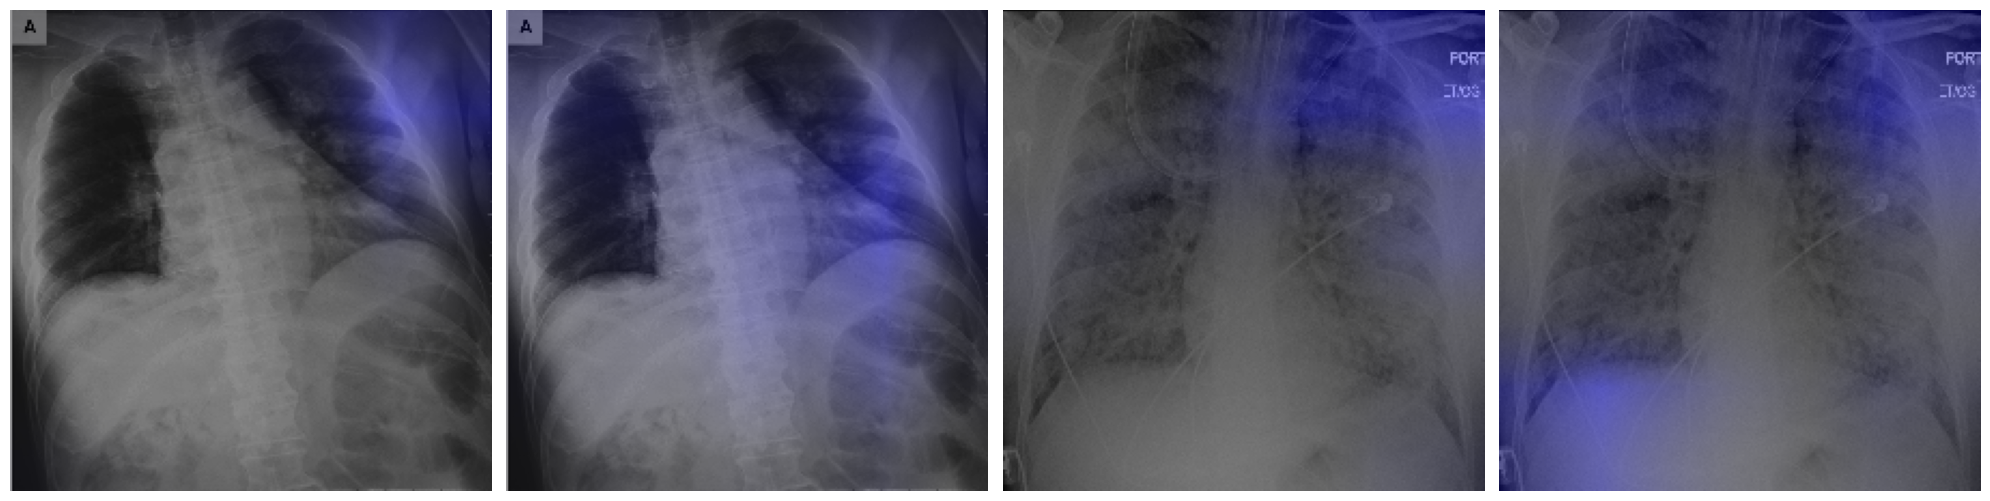

In [28]:
resnet_v_rs = MyResNet18()

rn_rs_train, rn_rs_test = train_and_run_model(resnet_v_rs, rs_train, rs_val, rs_test, sample_pos, sample_neg, 'resnet', vis = True)

##### DenseNet

Training model
Training completed in 9mins 6.13s
Best Loss: 0.0584 | Training F1: 0.8685
Precision: 0.8583 | Recall: 0.9121 | F1: 0.8844 | Predicted positives: 254 | Predicted negatives: 224 | Total: 478
Precision: 0.7917 | Recall: 0.7308 | F1: 0.7600 | Predicted positives: 48 | Predicted negatives: 33 | Total: 81
Predicted positive, positive for postive, negative


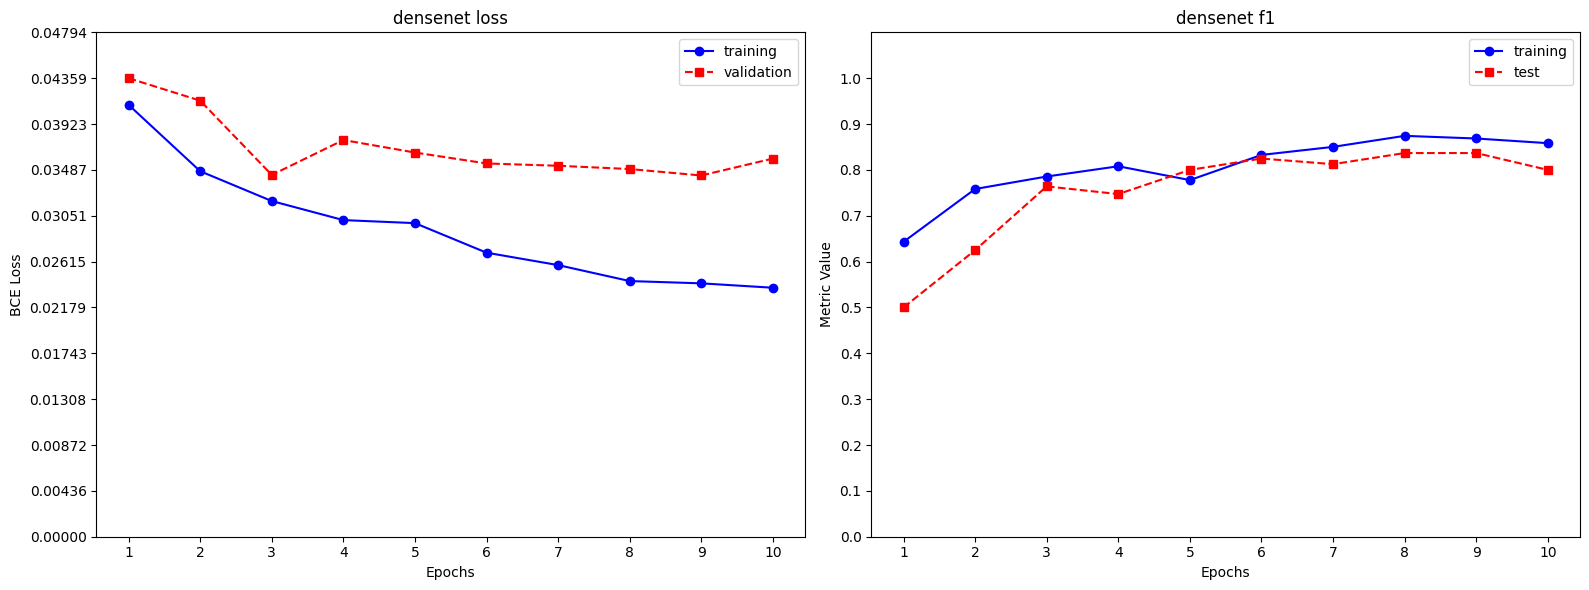

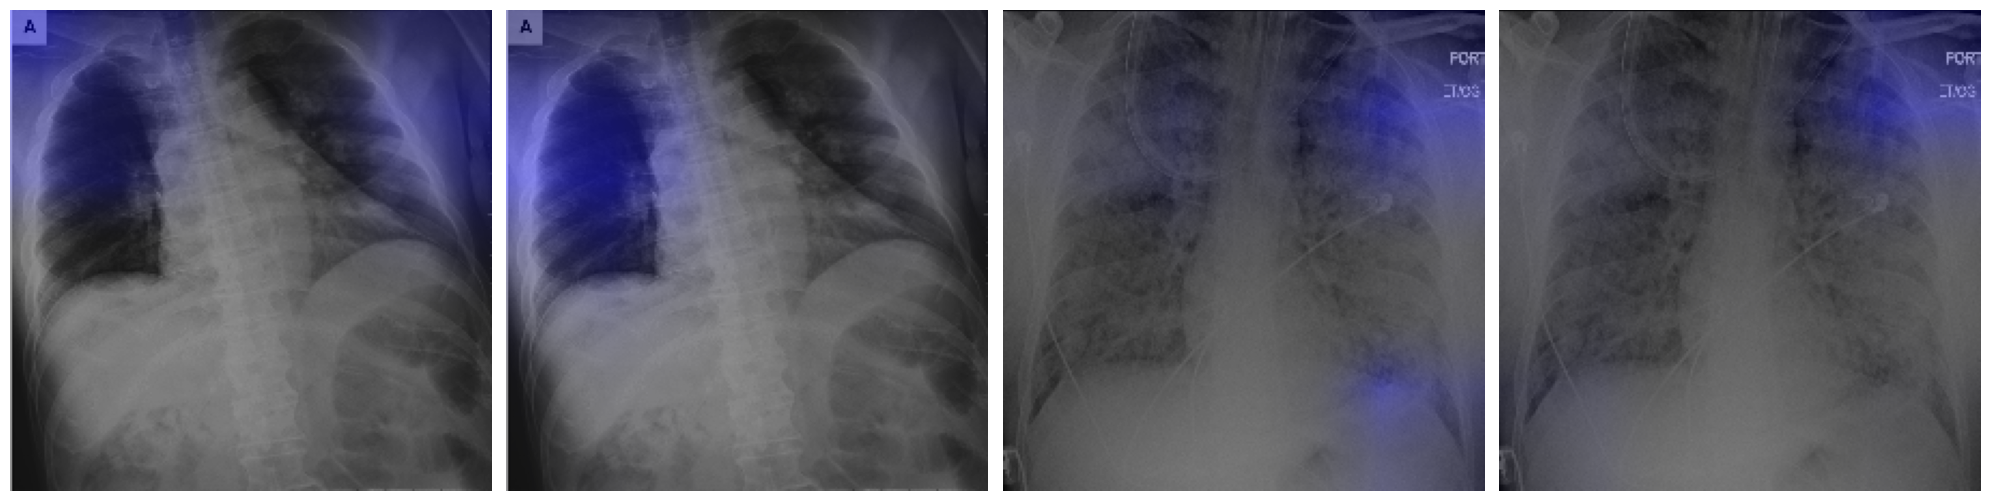

In [29]:
densenet_v_rs = MyDenseNet()

dn_rs_train, dn_rs_test = train_and_run_model(densenet_v_rs, rs_train, rs_val, rs_test, sample_pos, sample_neg, 'densenet', vis = True)

##### Models Comparison

In [32]:
headers = ['Model', 'Precision', 'Recall', 'F1 Score']
resampled_metrics = [
    ['linearnet (train)', ln_rs_train['prec'], ln_rs_train['rec'], ln_rs_train['f1']],
    ['linearnet (test)', ln_rs_test['prec'], ln_rs_test['rec'], ln_rs_test['f1']],
    ['convnet (train)', cn_rs_train['prec'], cn_rs_train['rec'], cn_rs_train['f1']],
    ['convnet (test)',cn_rs_test['prec'], cn_rs_test['rec'], cn_rs_test['f1']],
    ['resnet (train)', rn_rs_train['prec'], rn_rs_train['rec'], rn_rs_train['f1']],
    ['resnet (test)', rn_rs_test['prec'],rn_rs_test['rec'], rn_rs_test['f1']],
    ['densenet (train)', dn_rs_train['prec'], dn_rs_train['rec'], dn_rs_train['f1']],
    ['densenet (test)', dn_rs_test['prec'], dn_rs_test['rec'], dn_rs_test['f1']]
]
create_table(headers, resampled_metrics)

| Model | Precision | Recall | F1 Score |
| :- | :- | :- | :- |
| linearnet (train) | 0.501 | 1.0 | 0.6676 |
| linearnet (test) | 0.642 | 1.0 | 0.782 |
| convnet (train) | 0.5 | 1.0 | 0.6667 |
| convnet (test) | 0.642 | 1.0 | 0.782 |
| resnet (train) | 0.7629 | 0.9289 | 0.8377 |
| resnet (test) | 0.7447 | 0.6731 | 0.7071 |
| densenet (train) | 0.8583 | 0.9121 | 0.8844 |
| densenet (test) | 0.7917 | 0.7308 | 0.76 |



In [65]:
import pandas as pd

def create_table_with_pandas(headers, metrics):
    # Create a pandas DataFrame
    df = pd.DataFrame(metrics, columns=headers)
    
    # Display the DataFrame (this will look clean in Jupyter Notebook)
    print(df)
    
    # Optionally, save the table as a CSV or Excel file
    # df.to_csv("models_metrics.csv", index=False)
    # print("Table saved to models_metrics.csv")

In [66]:
create_table_with_pandas(headers, resampled_metrics)

               Model  Precision    Recall  F1 Score
0  linearnet (train)   0.501048  1.000000  0.667598
1   linearnet (test)   0.641975  1.000000  0.781955
2    convnet (train)   0.500000  1.000000  0.666667
3     convnet (test)   0.641975  1.000000  0.781955
4     resnet (train)   0.762887  0.928870  0.837736
5      resnet (test)   0.744681  0.673077  0.707071
6   densenet (train)   0.858268  0.912134  0.884381
7    densenet (test)   0.791667  0.730769  0.760000


In [67]:
rsm = {
    'linearnet (train)': ln_rs_train,
    'linearnet (test)': ln_rs_test,
    'convnet (train)': cn_rs_train,
    'convnet (test)': cn_rs_test,
    'resnet (train)': rn_rs_train,
    'resnet (test)': rn_rs_test,
    'densenet (train)': dn_rs_train,
    'densenet (test)': dn_rs_test,
}

In [71]:
ct1(headers, rsm)

Model  Precision    Recall  F1 Score
0  linearnet (train)   0.501048  1.000000  0.667598
1   linearnet (test)   0.641975  1.000000  0.781955
2    convnet (train)   0.500000  1.000000  0.666667
3     convnet (test)   0.641975  1.000000  0.781955
4     resnet (train)   0.762887  0.928870  0.837736
5      resnet (test)   0.744681  0.673077  0.707071
6   densenet (train)   0.858268  0.912134  0.884381
7    densenet (test)   0.791667  0.730769  0.760000

Table saved to models_metrics.csv


In [70]:
def ct1(headers, metrics_dict):
    # Transform the dictionary into a list of rows
    rows = [
        [model_name, metrics['prec'], metrics['rec'], metrics['f1']]
        for model_name, metrics in metrics_dict.items()
    ]

    # Create DataFrame
    df = pd.DataFrame(rows, columns=headers)

    # Display the DataFrame
    display(df)

    # Optionally, save the DataFrame to a CSV file
    df.to_csv("models_metrics.csv", index=False)
    print("Table saved to models_metrics.csv")